# Задание №1

In [1]:
import numpy as np
import math as m
import pandas as pd
from prettytable import PrettyTable
from matplotlib import pyplot as plt
from prettytable import PrettyTable

#### Вычисление узла интегрирования
t – текущее значение узла интегрирования.

y – текущее значение целевой функции

dy - массив, состоящий из узлов интегрирования


In [2]:
def Funct(t, y):
    dy = np.zeros((2))
    dy[0] = -y[0, 1] + (y[0, 0] * (y[0, 0]**2 +y[0, 1]**2 - 1))
    dy[1] = y[0, 0] + (y[0, 1] * ((y[0, 0]**2 +y[0,1]**2) - 1))
    return dy

#### Метод Рунге – Кутты 3-го порядка точности с постоянным шагом h
Array_AB – массив с началом и концом отрезка интегрирования

y0 – начальное значение целевой функции

N – количество разбиений отрезка интегрирования

T, Y - возвращает полученные значения целевой функции на каждом разбиении отрезка

In [3]:
def Runge_Kutta (Array_AB, y0, N):
    t = Array_AB[0]
    y = y0.copy()
    h = (Array_AB[1] - Array_AB[0]) / (N-1)
    T = np.zeros(N)
    Y = np.zeros((N, n))
    for i in range (0, N):
        k1 = (Funct(t, y))
        k2 = (Funct(t + (h / 3), y + (h / 3) * k1))
        k3 = (Funct(t + (2 / 3) * h, y + (2 / 3) * h * k2))
        Y[i, :] = y
        y += h * (k1+ 3 * k3) / 4
        T[i] = t
        t += h
    return T, Y

# Задание №2

#### Тест программы на системе уравнений


In [4]:
def Test(T, N):
    u = np.zeros((N,2))
    for i in range(N):
        u[i,0] = (m.cos(T[i])) / (1 + np.exp(2*T[i]))**(0.5)
        u[i,1] = (m.sin(T[i])) / (1 + np.exp(2*T[i]))**(0.5)
    return u


In [5]:
n = 2
N = 10
Array_Test = np.array([0, 5])

In [6]:
y0=np.array([[(1/m.sqrt(2)),0]])

T, Y = Runge_Kutta(Array_Test, y0, N+1 )

U = Test(T, N+1)

In [7]:
y0

array([[0.70710678, 0.        ]])

In [8]:
mytable = PrettyTable()
mytable.add_column("T", T)
mytable.add_column(" Y1 приближенное Y2 приближенное ",Y)
mytable.add_column(" Y1 точное Y2 точное ", U)
mytable.add_column(" Y1 погрешность Y2 погрешность ", abs(Y-U))
print(mytable)

+-----+-----------------------------------+---------------------------+---------------------------------+
|  T  |  Y1 приближенное Y2 приближенное  |    Y1 точное Y2 точное    |  Y1 погрешность Y2 погрешность  |
+-----+-----------------------------------+---------------------------+---------------------------------+
| 0.0 |      [0.70710678 0.        ]      |  [0.70710678 0.        ]  |             [0. 0.]             |
| 0.5 |      [0.45422089 0.24464304]      |  [0.45511048 0.24862799]  |     [0.00088958 0.00398495]     |
| 1.0 |      [0.19032679 0.28630788]      |  [0.18654356 0.29052439]  |     [0.00378322 0.00421651]     |
| 1.5 |      [0.02092707 0.21768494]      |  [0.01540478 0.21722929]  |     [0.00552229 0.00045564]     |
| 2.0 |     [-0.05265544  0.12574635]     | [-0.05581057  0.12194831] |     [0.00315513 0.00379804]     |
| 2.5 |     [-0.06549595  0.05306627]     | [-0.06554144  0.04896091] | [4.54890890e-05 4.10535995e-03] |
| 3.0 |     [-0.05105108  0.00967297]     | [-

In [9]:
Y1 = [arr[0] for arr in Y]
Y2 = [arr[1] for arr in Y]
U1 = [arr[0] for arr in U]
U2 = [arr[1] for arr in U]
dif1 = [arr[0] for arr in abs(Y-U)]
dif2 = [arr[1] for arr in abs(Y-U)]

df = pd.DataFrame(columns=['T','Y1 pr','Y2 pr','Y1 Toch','Y2 Toch','Y1 Er','Y2 Er'])
df['T'] = np.array(T)
df['Y1 pr'] = np.array(Y1)
df['Y2 pr'] = np.array(Y2)
df['Y1 Toch'] = np.array(U1)
df['Y2 Toch'] = np.array(U2)
df['Y1 Er'] = np.array(dif1)
df['Y2 Er'] = np.array(dif2)

df

,T,Y1 pr,Y2 pr,Y1 Toch,Y2 Toch,Y1 Er,Y2 Er
0,0.0,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000
1,0.5,0.454221,0.244643,0.455110,0.248628,0.000890,0.003985
2,1.0,0.190327,0.286308,0.186544,0.290524,0.003783,0.004217
3,1.5,0.020927,0.217685,0.015405,0.217229,0.005522,0.000456
4,2.0,-0.052655,0.125746,-0.055811,0.121948,0.003155,0.003798
5,2.5,-0.065496,0.053066,-0.065541,0.048961,0.000045,0.004105
6,3.0,-0.051051,0.009673,-0.049228,0.007017,0.001823,0.002656
7,3.5,-0.030497,-0.009654,-0.028266,-0.010588,0.002232,0.000933
8,4.0,-0.013708,-0.014128,-0.011970,-0.013859,0.001738,0.000269
9,4.5,-0.003305,-0.011652,-0.002342,-0.010859,0.000963,0.000793


# Задание №3




In [10]:
def Max_Error_eps(max_y1, max_y2, h_app, a, b, step):
    for k in range(a,b,step):
        N = k
        Arr_Test = np.array([0, 5])
        h_er = (Arr_Test[1] - Arr_Test[0]) / (N)
        h_app.append(h_er)
        y0_start=np.array([[(1/m.sqrt(2)),0]])
        T, Y = Runge_Kutta(Arr_Test, y0_start, N+1 )
        U = Test(T, N+1)
        razn1=np.zeros(N+1)
        razn2=np.zeros(N+1)
        for j in range (N+1):
            razn1[j]=abs(Y[j,0]-U[j,0])
            razn2[j]=abs(Y[j,1]-U[j,1])
        max_y1.append(max(razn1))
        max_y2.append(max(razn2))
        
    return(max_y1, max_y2, h_app)

In [11]:
max_y1=[]
max_y2=[]
h_app=[]
max_y1, max_y2, hhh = Max_Error_eps(max_y1, max_y2, h_app, 10, 500, 5)

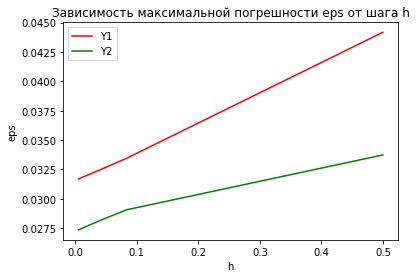

In [21]:
plt.plot(h_app,max_y1, label ='Y1',color='red')
plt.plot(h_app,max_y2, label = 'Y2',color='green')
plt.legend()
plt.title('Зависимость максимальной погрешности eps от шага h')
plt.xlabel('h')
plt.ylabel('eps')
plt.show()

In [13]:
def Max_Error_eps_h(max_y1, max_y2, h_app, a, b, step):
    for k in range(a,b,step):
        N = k
        Arr_Test = np.array([0, 5])
        h_er = (Arr_Test[1] - Arr_Test[0]) / (N)
        h_app.append(h_er)
        y0_start=np.array([[(1/m.sqrt(2)),0]])
        T, Y = Runge_Kutta(Arr_Test, y0_start, N+1 )
        U = Test(T, N+1)
        razn1=np.zeros(N+1)
        razn2=np.zeros(N+1)
        p=h_er*h_er*h_er
        for j in range (N+1):
            razn1[j]=abs(Y[j,0]-U[j,0])
            razn2[j]=abs(Y[j,1]-U[j,1])
        max_y1.append(max(razn1)/p)
        max_y2.append(max(razn2)/p)
        
    return(max_y1, max_y2, h_app)

In [14]:
max_y1=[]
max_y2=[]
h_app=[]
max_y1, max_y2, hhh = Max_Error_eps_h(max_y1, max_y2, h_app, 10, 1000, 50)

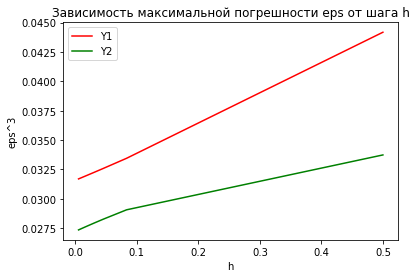

In [20]:
plt.plot(h_app,max_y1, label ='Y1',color='red')
plt.plot(h_app,max_y2, label = 'Y2',color='green')
plt.legend()
plt.title('Зависимость максимальной погрешности eps от шага h')
plt.xlabel('h')
plt.ylabel('eps^3')
plt.show()

# Задание №5

#### Безразмерная форма уравнения

In [16]:
eps=0.1
gamma = 1
def F (t, xy, alpha):
    dy = np.zeros((2))
    dy[0] = (1 - eps * xy[0,0]) * xy[0,0] - ((xy[0,0] * xy[0,1])/(1 + alpha*xy[0,0]))
    dy[1] = gamma * (xy[0,0]/(1 + alpha*xy[0,0]) - 1)*xy[0,1]
    return dy

#### Метод Рунге – Кутты 3-го порядка точности с параметром alpha



In [17]:
def Runge_Kutta_2(Array_AB, x0y0, N, alpha):
    t = Array_AB[0]
    xy = x0y0.copy()
    h = (Array_AB[1] - Array_AB[0]) / N
    T = np.zeros(N+1)
    #T[0] = t
    XY = np.zeros((N+1, n))
    XY[0] = xy
    for i in range (0, N+1):
        k1 = (F(t, xy, alpha))
        k2 = (F(t + (h / 3), xy + (h / 3) * k1, alpha))
        k3 = (F(t + (2 / 3) * h, xy + (2 / 3) * h * k2, alpha))
        XY[i, :] = xy
        xy= xy+  (h * (k1+ 3.0* k3) / 4.0)
        T[i] = t
        t += h
    return T, XY

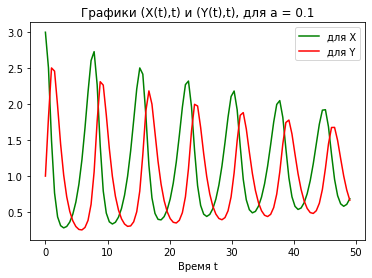

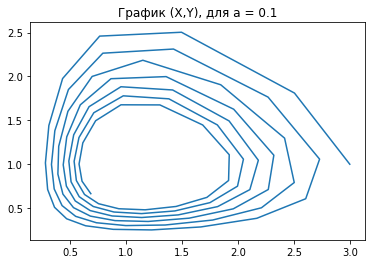

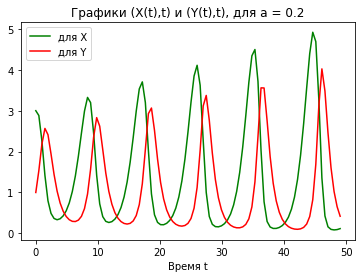

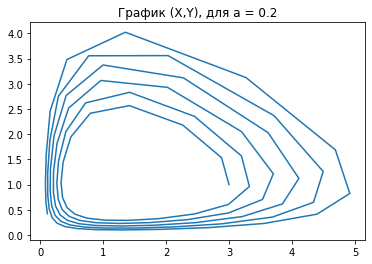

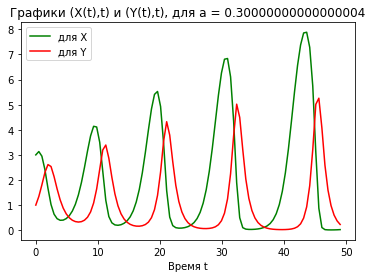

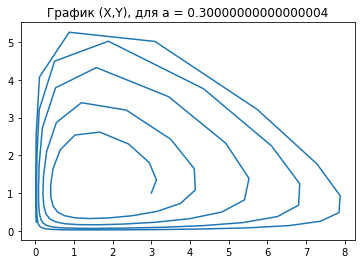

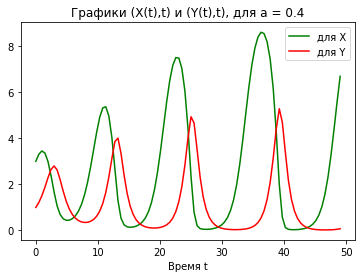

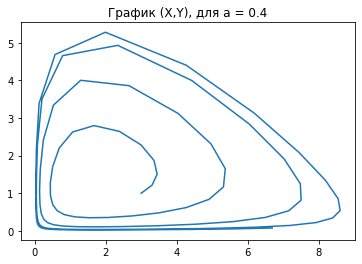

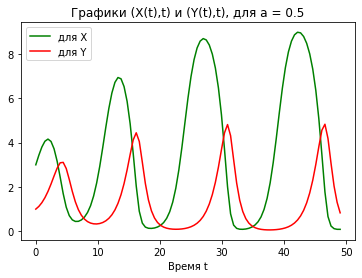

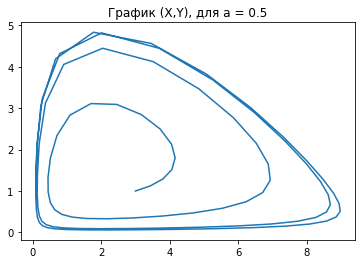

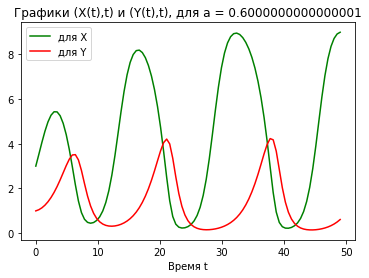

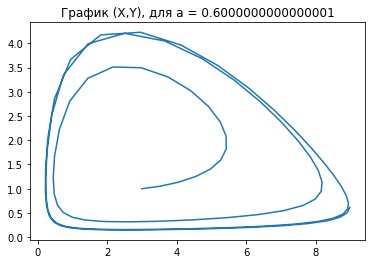

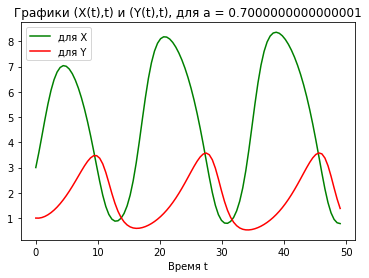

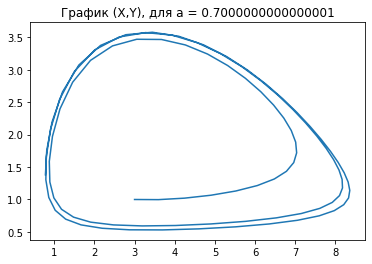

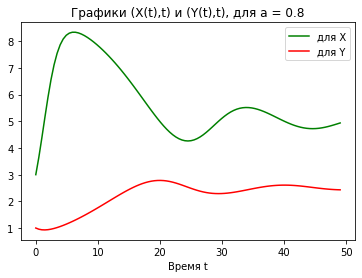

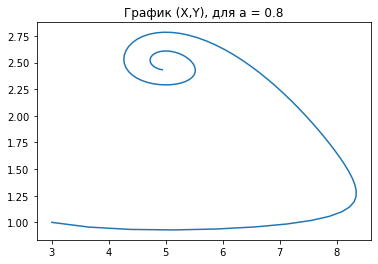

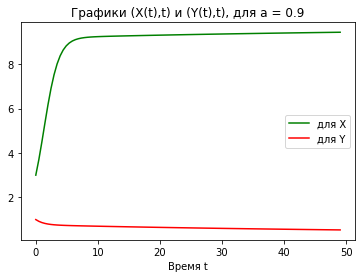

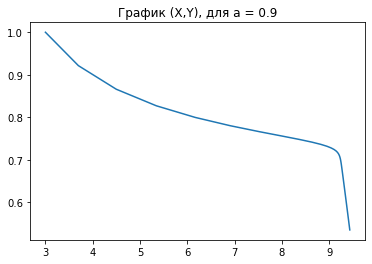

In [22]:
X0Y0 = np.array([[3, 1]])
Array_AB = np.array([0, 49])
N = 100
for i in range (1, 10):
    T, XY = Runge_Kutta_2(Array_AB, X0Y0, N, (i*0.1))
    fig, ax = plt.subplots()
    ax.plot(T[:], XY[:,0],label ='для X',color='green')
    ax.plot(T[:], XY[:,1],label ='для Y',color='red')
    ax.set_xlabel("Время t")
    plt.legend()
    plt.title("Графики (X(t),t) и (Y(t),t), для a = "+ str(i*0.1))
    plt.show()
    fig, ax = plt.subplots()
    ax.plot(XY[:,0], XY[:,1])
    plt.title("График (X,Y), для a = "+ str(i*0.1))
    plt.show()